In [145]:
#LIBRARIES:

#Import data wrangling libraries
import pandas as pd
import numpy as np
import os
import time

#Import graphing libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [208]:
# FUNCTIONS:

#Importing dataset
def get_data(file):
    return pd.read_csv('../{}.csv'.format(file),  sep=';')



#Defining features and groundtruth
def set_xy(data, tst_size):
    '''columns = data.columns
    scaler = StandardScaler()
    scaler.fit(data)
    data = pd.DataFrame(scaler.transform(data))
    data.columns = columns'''
    
    X = data.drop('cardio', axis=1)
    y = data.cardio
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tst_size)
    return X, X_train, X_test, y, y_train, y_test



#Plotting a correlation heatmap
def plot_corr(df,size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cmap = sns.cubehelix_palette(light=1, as_cmap=True)
    ax = sns.heatmap(corr, annot=True, cmap=cmap).set_title("Data Correlation Heatmap")
    fig.savefig('images/corr_heatmap.png')

    
    
#Checking data types and null values from data set
def check_data(df):
    print('------- Checking Data -------\n\n')
    plot_corr(data)
    print('The number of N/A values in the data frame are: \n{}\n\n'.format(df.isna().sum()))
    print('The types of data in the data frame are: \n{}\n'.format(df.dtypes))
    print('\n\n------- Checking Data -------\n\n')

    
    
#Graphing confusion matrix for results
def conf_mat(y_test, y_pred, title, size=3):
    conf = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize = (size,size))
    cmap = sns.cubehelix_palette(light=1, as_cmap=True)
    ax = sns.heatmap(conf, annot=True, cmap=cmap).set_title("Confusion Matrix for {}".format(title))
    plt.xlabel("Groundtruth")
    plt.ylabel("Predictions")
    fig.savefig('images/conf_mat_heatmap.png')
 

#Logistic Regresion Model
def LR_model(X, X_train, X_test, y, y_train, y_test, predict = True):
    now = time.time()
    clf = LogisticRegression(solver='lbfgs', max_iter=500)
    if predict:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = round(accuracy_score(y_test, y_pred),4)
        conf_mat(y_test, y_pred, 'Logistic Regresion')
        print('Logistic Regresion accuracy score: {}'.format(acc))
        print('Computational time: {0:.2f}sec. \n\n-------------------------'.format(time.time()-now))
    else:
        scores = cross_val_score(clf, X, y, cv=5)
        print('Log. Reg. Score: {:.3f} (+/- {:.2f})'.format(np.mean(scores), np.std(scores)))
        print('Computational time: {0:.2f}sec. \n\n-------------------------'.format(time.time()-now))

        
        
#Support Vector Machine Classifier prediction
def SVC_model(X, X_train, X_test, y, y_train, y_test, predict = True):
    now = time.time()
    clf = SVC(gamma='scale')
    if predict:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = round(accuracy_score(y_test, y_pred),4)
        conf_mat(y_test, y_pred, 'Support Vector Classifier')
        print('Support Vector Classifier accuracy score: {}'.format(acc))
        print('Computational time: {0:.2f}sec. \n\n-------------------------'.format(time.time()-now))

    else:
        scores = cross_val_score(clf, X, y, cv=5)
        print('Supp. Vec. Score: {:.3f} (+/- {:.2f})'.format(np.mean(scores), np.std(scores)))
        print('Computational time: {0:.2f}sec. \n\n-------------------------'.format(time.time()-now))
    
    
    
#Random Forest Classifier prediction
def RF_model(X, X_train, X_test, y, y_train, y_test, n_est=100, max_depth=2, predict = True):
    now = time.time()
    clf = RandomForestClassifier(n_estimators=n_est, max_depth=max_depth, random_state=0)
    if predict:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = round(accuracy_score(y_test, y_pred),4)
        conf_mat(y_test, y_pred, 'Random Forest Classifier')
        print('Random Forest Classifier accuracy score: {}'.format(acc))
        print('Computational time: {0:.2f}sec. \n\n-------------------------'.format(time.time()-now))
    else:
        scores = cross_val_score(clf, X, y, cv=5)
        print('Rand. Frst. Score: {:.3f} (+/- {:.2f})'.format(np.mean(scores), np.std(scores)))
        print('Computational time: {0:.2f}sec. \n\n-------------------------'.format(time.time()-now))
        
        
        
#K-Neighbors Classifier prediction
def KN_model(X, X_train, X_test, y, y_train, y_test, predict = True):
    now = time.time()
    clf = KNeighborsClassifier(n_neighbors=5)
    if predict:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = round(accuracy_score(y_test, y_pred),4)
        conf_mat(y_test, y_pred, 'Random Forest Classifier')
        print('Random Forest Classifier accuracy score: {}'.format(acc))
        print('Computational time: {0:.2f}sec. \n\n-------------------------'.format(time.time()-now))
    else:
        scores = cross_val_score(clf, X, y, cv=5)
        print('K-Neigh. Score: {:.3f} (+/- {:.2f})'.format(np.mean(scores), np.std(scores)))
        print('Computational time: {0:.2f}sec. \n\n-------------------------'.format(time.time()-now))
        
        
        
#Random Forest Classifier grid serach
def RF_grid(X, X_train, X_test, y_train, y, y_test, n_est=100, max_depth=2):
    results=[]
    for est in n_est:
        for depth in max_depth:
            now = time.time()
            clf = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=0)
            scores = cross_val_score(clf, X, y, cv=5)
            res={
                'Num-Estimators':est,
                'Max-Depth':depth,
                'Score':np.mean(scores),
                'Comp-Time':time.time()-now
            }
            results.append(res)
    return results

------- Checking Data -------


The number of N/A values in the data frame are: 
id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


The types of data in the data frame are: 
id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object



------- Checking Data -------




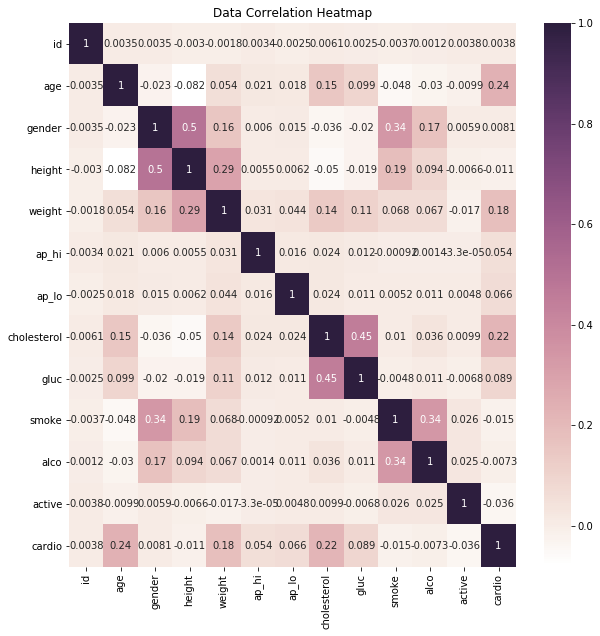

In [190]:
#CHECK DATA SET QUALITY:

if __name__ == "__main__":
    data = get_data('cardio_train')
    check_data(data)

In [191]:
# SCORING MODELS WITH DEFAULT PARAMETERS

if __name__ == "__main__":
    print ("Model's performace results:")
    sample_data = data.sample(frac=0.05)
    X, X_train, X_test, y, y_train, y_test = set_xy(sample_data, 0.80)
    LR_model(X, X_train, X_test, y, y_train, y_test, predict=False)
    SVC_model(X, X_train, X_test, y, y_train, y_test, predict=False)
    RF_model(X, X_train, X_test, y, y_train, y_test, predict=False)
    KN_model(X, X_train, X_test, y, y_train, y_test, predict = False)

Model's performace results:
Log. Reg. Score: 0.690 (+/- 0.01)
Computational time: 0.55sec. 

-------------------------
Supp. Vec. Score: 0.600 (+/- 0.01)
Computational time: 2.56sec. 

-------------------------
Rand. Frst. Score: 0.721 (+/- 0.01)
Computational time: 0.79sec. 

-------------------------
K-Neigh. Score: 0.544 (+/- 0.02)
Computational time: 0.16sec. 

-------------------------


In [192]:
# Grid Search optimizer for Random Forest 
if __name__ == "__main__":
    n_est = [10,100,500,1000]
    max_depth = [2,4,5,10]
    grid_result = pd.DataFrame(RF_grid(X, X_train, X_test, y_train, y, y_test, n_est, max_depth))
    grid_result['Score/Time'] = grid_result['Score']/grid_result['Comp-Time']
    display(grid_result)
    

,Comp-Time,Max-Depth,Num-Estimators,Score,Score/Time
0,0.126879,2,10,0.721711,5.688184
1,0.134571,4,10,0.725430,5.390684
2,0.145601,5,10,0.719998,4.945003
3,0.191227,10,10,0.715130,3.739688
4,1.151730,2,100,0.720852,0.625887
5,1.310214,4,100,0.722858,0.551710
6,1.052973,5,100,0.722571,0.686220
7,1.626151,10,100,0.721133,0.443460
8,4.298257,2,500,0.720564,0.167641
9,4.650630,4,500,0.722284,0.155309


In [193]:
# Grid Search optimizer for Random Forest 
if __name__ == "__main__":
    n_est = [5,10,50,100]
    max_depth = [3,4,5]
    grid_result = pd.DataFrame(RF_grid(X, X_train, X_test, y_train, y, y_test, n_est, max_depth))
    grid_result['Score/Time'] = grid_result['Score']/grid_result['Comp-Time']
    display(grid_result)

,Comp-Time,Max-Depth,Num-Estimators,Score,Score/Time
0,0.090115,3,5,0.720851,7.999275
1,0.074676,4,5,0.722855,9.679843
2,0.080196,5,5,0.716848,8.938686
3,0.119602,3,10,0.721997,6.036678
4,0.145868,4,10,0.725430,4.973186
5,0.133641,5,10,0.719998,5.387569
6,0.448789,3,50,0.721142,1.606861
7,0.509020,4,50,0.723428,1.421218
8,0.547393,5,50,0.721997,1.318974
9,0.899447,3,100,0.721998,0.802713


In [194]:
# Grid Search optimizer for Random Forest 
if __name__ == "__main__":
    n_est = [20,30,40,50]
    max_depth = [4,5]
    grid_result = pd.DataFrame(RF_grid(X, X_train, X_test, y_train, y, y_test, n_est, max_depth))
    grid_result['Score/Time'] = grid_result['Score']/grid_result['Comp-Time']
    display(grid_result)

,Comp-Time,Max-Depth,Num-Estimators,Score,Score/Time
0,0.240212,4,20,0.721428,3.003290
1,0.247507,5,20,0.723137,2.921685
2,0.325734,4,30,0.724002,2.222677
3,0.355104,5,30,0.720572,2.029187
4,0.422431,4,40,0.724283,1.714562
5,0.482630,5,40,0.721713,1.495375
6,0.581087,4,50,0.723428,1.244957
7,0.575662,5,50,0.721997,1.254203


Random Forest Classifier accuracy score: 0.7274
Computational time: 1.17sec. 

-------------------------


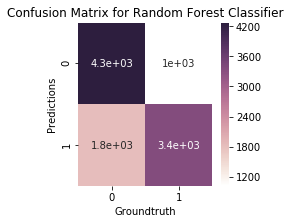

In [209]:
# TESTING MODEL WITH DEAFULT SETTINGS
if __name__ == "__main__":
    X, X_train, X_test, y, y_train, y_test = set_xy(data, 0.15)
    RF_model(X, X_train, X_test, y, y_train, y_test, 30, 5)